# Ordinary differential equations

An ordinary differential equation is an equation of a type
$$
\frac{dx}{dt} = f(x,t),
$$
where $f(x,t)$ is some function.
Together with the initial condition $x(t=0) = x_0$ it defines
the $x(t)$ dependence at $t>0$.

In many physical applications $t$ plays the role of the time variable (classical mechanics problems),
although this is not always the case.

Some differential equations can be solved explicitly, the solution to
$$
\frac{dx}{dt} = \sin t,
$$
reads
$$
x(t) = x_0 + \int_0^t \sin t' dt' = x_0 + 1 - \cos t.
$$

In general case, however, the solution cannot be obtained analytically.
Let us consider for example
$$
\frac{dx}{dt} = -x^3 + \sin t.
$$

In this case one resorts to numerical methods.

## Euler's method

Suppose we have an ODE:
$$
\frac{dx}{dt} = f(x,t).
$$

Let us apply the Taylor expansion to express $x(t+h)$ in terms of $x(t)$:
$$
x(t+h) = x(t) + h \, \frac{dx}{dt} + \mathcal{O}(h^2)~.
$$

Given that $dx/dt = f(x,t)$ and neglecting the high-order terms in $h$ we have
$$
x(t+h) \approx x(t) + h \, f[x(t),t]~.
$$
We can iteratively apply this relation starting from $t = 0$ to evaluate $x(t)$ at $t > 0$.

This is the essence of the *Euler's method* -- the simplest method for solving ODEs numerically.

In [1]:
import numpy as np

def ode_euler_step(f, x, t, h):
    """Perform a single step h using Euler's scheme.

    Args:
    f: the function that defines the ODE.
    x: the value of the dependent variable at the present step.
    t: the present value of the time variable.
    h: the time step

    Returns:
    xnew: the value of the dependent variable at the step t+h
    """
    return x + h * f(x,t)

def ode_euler(f, x0, t0, h, nsteps):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps using Euler's method.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
          h: the time step
     nsteps: the total number of Euler steps

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_euler_step(f, x[i], t[i], h)
    return t,x

Let us apply the Euler's method to solve the differential equation
$$
\frac{dx}{dt} = -x^3 + \sin t.
$$
with the initial condition $x_0 = 0$ at $t_0 = 0$ from $t = 0$ to $t = 10$ in 1000 steps.

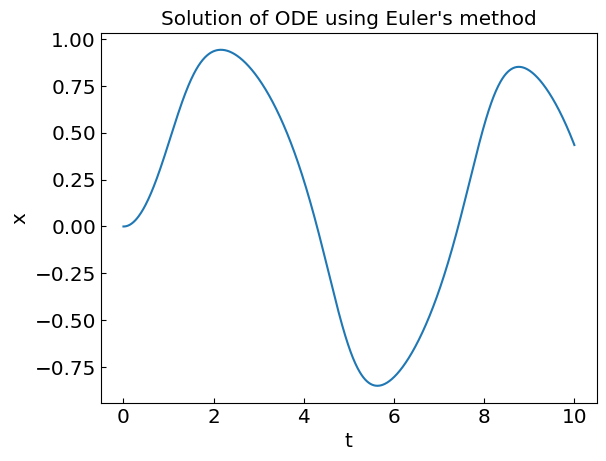

In [2]:
# Define the ODE
def f(x, t):
    return -x**3 + np.sin(t)

t0 = 0.
tend = 10.0
N = 1000
h = (tend - t0) / N
x0 = 0.

ODEsol = ode_euler(f,x0,t0,h,N)

# Plot the solution
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.plot(ODEsol[0], ODEsol[1])
plt.xlabel('t')
plt.ylabel('x')
plt.title("Solution of ODE using Euler's method")
plt.show()


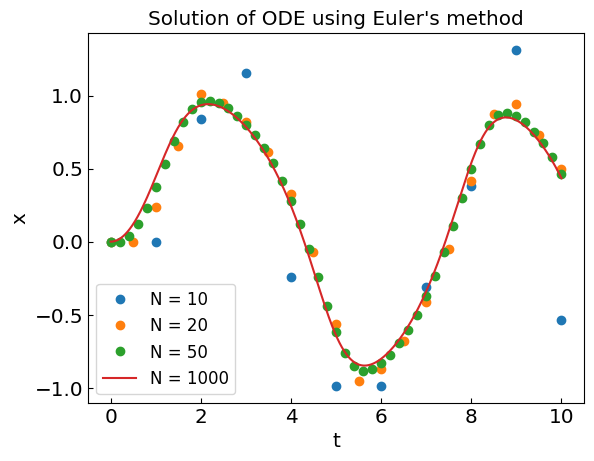

In [3]:
N = 10
h = (tend - t0) / N
ODEsolN10 = ode_euler(f,x0,t0,h,N)

N = 20
h = (tend - t0) / N
ODEsolN20 = ode_euler(f,x0,t0,h,N)

N = 50
h = (tend - t0) / N
ODEsolN50 = ode_euler(f,x0,t0,h,N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_euler(f,x0,t0,h,N)

plt.plot(ODEsolN10[0], ODEsolN10[1], 'o', label='N = 10')
plt.plot(ODEsolN20[0], ODEsolN20[1], 'o', label='N = 20')
plt.plot(ODEsolN50[0], ODEsolN50[1], 'o', label='N = 50')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler's method")
plt.show()

The error of Euler's scheme is proportional to $h^2$ at each step. Since the total number of steps is $N = (t_{\rm end} - t_0)/h$, the total accumulated error is linear in $h$, i.e. of order $\mathcal{O}(h)$.

## Midpoint (second-order Runge-Kutta) method

Better schemes with a smaller error can be achieved with little extra work.

Euler's method essentially corresponds to approximating the derivative $dx/dt$ with a forward difference
$$
\frac{dx}{dt} = f(x,t) \approx \frac{x(t+h) - x(t)}{h} + \mathcal{O}(h).
$$

Recall that better accuracy in numerical differentiation can be obtained if one uses central (midpoint) difference, 
$$
f(x,t+h/2) \approx \frac{x(t+h) - x(t)}{h} + \mathcal{O}(h^2).
$$

Let us exploit this idea applied to ODEs.
Consider Taylor expansions of $x(t+h)$ and $x(t)$ around $x(t+h/2)$:
\begin{align}
x(t+h) = x(t + h/2) + \frac{1}{2} h \left( \frac{dx}{dt} \right)_{t+h/2} + \frac{1}{8} h^2 \left( \frac{d^2x}{dt^2} \right)_{t+h/2} + \mathcal{O}(h^3),\\
x(t) = x(t + h/2) - \frac{1}{2} h \left( \frac{dx}{dt} \right)_{t+h/2} + \frac{1}{8} h^2 \left( \frac{d^2x}{dt^2} \right)_{t+h/2} + \mathcal{O}(h^3),\\
\end{align}

Subtracting the second equation from the first one we get
\begin{align}
x(t+h) & = x(t) + h \left( \frac{dx}{dt} \right)_{t+h/2} + \mathcal{O}(h^3),\\
& = x(t) + h f[x(t+h/2),t+h/2)] + \mathcal{O}(h^3)
\end{align}

How to calculate $x(t+h/2)$? Use Euler's scheme
$$
x(t+h/2) = x(t) + \frac{1}{2}h f(x,t) + \mathcal{O}(h^2)
$$

It can be shown using Taylor expansion that
$$
f[x(t+h/2),t+h/2)] = f\left[x(t) + \frac{1}{2}h f(x,t), t + \frac{1}{2}h\right] + \mathcal{O}(h^2).
$$

Therefore, 
$$
x(t+h) = x(t) + h f\left[x(t) + \frac{1}{2}h f(x,t), t + \frac{1}{2}h\right]  + \mathcal{O}(h^3),\\
$$
which can iteratively be written as
\begin{align}
k_1 & = h \, f(x,t), \\
k_2 & = h \, f(x+k_1/2,t+h/2), \\
x(t+h) & = x(t) + k_2~.
\end{align}

This is the midpoint (or second-order Runge-Kutta method) which has a local (per one step) error of order $\mathcal{O}(h^3)$.


In [4]:
import numpy as np

def ode_rk2_step(f, x, t, h):
    """Perform a single step h using 2nd order Runge-Kutta scheme.

    Args:
    f: the function that defines the ODE.
    x: the value of the dependent variable at the present step.
    t: the present value of the time variable.
    h: the time step

    Returns:
    xnew: the value of the dependent variable at the step t+h
    """
    k1 = h * f(x,t)
    k2 = h * f(x + k1/2., t + h /2.)
    return x + k2

def ode_rk2(f, x0, t0, h, nsteps):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps using Euler's method.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
          h: the time step
     nsteps: the total number of Euler steps

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk2_step(f, x[i], t[i], h)
    return t,x

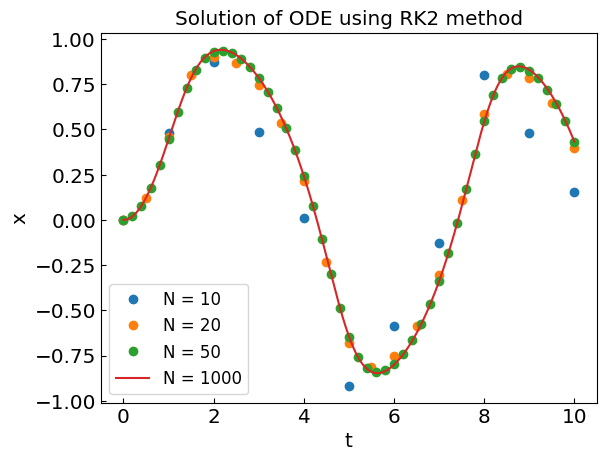

In [5]:
N = 10
h = (tend - t0) / N
ODEsolN10 = ode_rk2(f,x0,t0,h,N)

N = 20
h = (tend - t0) / N
ODEsolN20 = ode_rk2(f,x0,t0,h,N)

N = 50
h = (tend - t0) / N
ODEsolN50 = ode_rk2(f,x0,t0,h,N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_rk2(f,x0,t0,h,N)

plt.plot(ODEsolN10[0], ODEsolN10[1], 'o', label='N = 10')
plt.plot(ODEsolN20[0], ODEsolN20[1], 'o', label='N = 20')
plt.plot(ODEsolN50[0], ODEsolN50[1], 'o', label='N = 50')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using RK2 method")
plt.show()

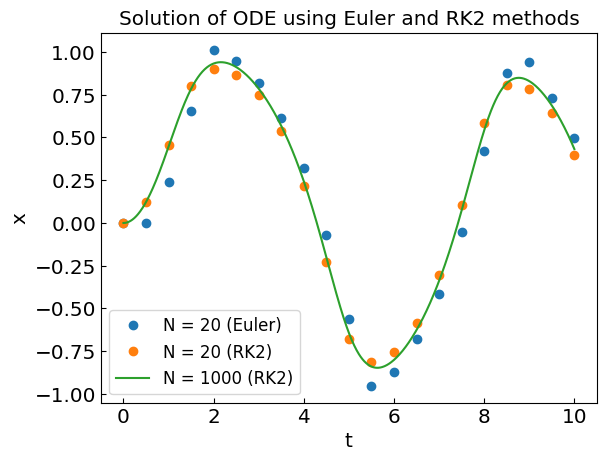

In [6]:
## Compare Euler and RK2 schemes

N = 20
h = (tend - t0) / N
ODEsolN10Euler = ode_euler(f,x0,t0,h,N)
ODEsolN10RK2 = ode_rk2(f,x0,t0,h,N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_rk2(f,x0,t0,h,N)

plt.plot(ODEsolN10Euler[0], ODEsolN10Euler[1], 'o', label='N = 20 (Euler)')
plt.plot(ODEsolN10RK2[0], ODEsolN10RK2[1], 'o', label='N = 20 (RK2)')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000 (RK2)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler and RK2 methods")
plt.show()

## The Fourth-Order Runge-Kutta method

The above logic can be generalized to cancel high-order error terms in various powers in $h$.
This will require more evaluations of function $f(x,t)$ at intermediate steps.
The following classical 4th order Runge-Kutta method is often considered to be a sweet spot.
It corresponds to the following scheme:
\begin{align}
k_1 & = h \, f(x,t), \\
k_2 & = h \, f(x+k_1/2,t+h/2), \\
k_3 & = h \, f(x+k_2/2,t+h/2), \\
k_4 & = h \, f(x+k_3,t+h), \\
x(t+h) & = x(t) + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)~.
\end{align}



In [7]:
def ode_rk4_step(f, x, t, h):
    """Perform a single step h using 4th order Runge-Kutta method.

    Args:
    f: the function that defines the ODE.
    x: the value of the dependent variable at the present step.
    t: the present value of the time variable.
    h: the time step

    Returns:
    xnew: the value of the dependent variable at the step t+h
    """
    k1 = h * f(x,t)
    k2 = h * f(x + k1/2., t + h /2.)
    k3 = h * f(x + k2/2., t + h /2.)
    k4 = h * f(x + k3, t + h)
    return x + (k1 + 2. * k2 + 2. * k3 + k4) / 6.

def ode_rk4(f, x0, t0, h, nsteps):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps using 4th order Runge-Kutta method.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
          h: the time step
     nsteps: the total number of Euler steps

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk4_step(f, x[i], t[i], h)
    return t,x

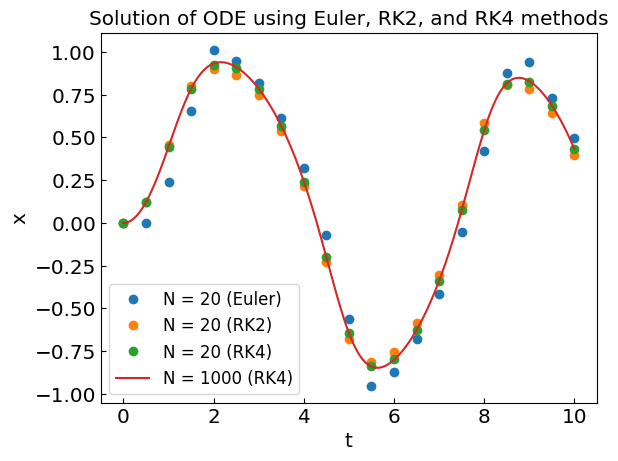

In [8]:
N = 20
h = (tend - t0) / N
ODEsolN10Euler = ode_euler(f,x0,t0,h,N)
ODEsolN10RK2 = ode_rk2(f,x0,t0,h,N)
ODEsolN10RK4 = ode_rk4(f,x0,t0,h,N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_rk4(f,x0,t0,h,N)

plt.plot(ODEsolN10Euler[0], ODEsolN10Euler[1], 'o', label='N = 20 (Euler)')
plt.plot(ODEsolN10RK2[0], ODEsolN10RK2[1], 'o', label='N = 20 (RK2)')
plt.plot(ODEsolN10RK4[0], ODEsolN10RK4[1], 'o', label='N = 20 (RK4)')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000 (RK4)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler, RK2, and RK4 methods")
plt.show()

## Adaptive time step

It can be useful to control the time step $h$ adaptively, such that it corresponds to the desired accuracy of calculations.
If $h$ is too small, we waste computing resources by making too many calculations.
On the other hand, if $h$ is too large, we will not achieve the desired accuracy.

To solve this problem we can introduce error estimate at each step, and adjust the time step accordingly to reduce the error.
One way to do so is to use a combination of two Runge-Kutta methods of different order.
The difference between the two gives an error estimate for the present step size, which can then be adjusted as necessary.
The [Runge-Kutta-Fehlberg method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta%E2%80%93Fehlberg_method) is one popular example combining 4th and 5th order Runge-Kutta methods.

Here we consider another approach applied to 4th order Runge-Kutta method. Recall that the error for one time step $h$ is of order $ch^5$. Let us take two RK4 steps h to approximate $x(t+2h) \approx x_1$. Then, the error estimate is
$$
x(t+2h) = x_1 + 2 c h^5. 
$$
On the other hand, $x(t+2h)$ can also be approximated by a single RK4 step of size 2h, $x(t+2h) \approx x_2$ with
$$
x(t+2h) = x_2 + 32 c h^5. 
$$
The error $\epsilon c h^5$ for a single RK4 step of size $h$ is thus
$$
\epsilon = |c h^5| = \frac{|x_1 - x_2|}{30}.
$$

If the desired accuracy per unit time is $\delta$, the desired accuracy per time step is $h' \delta$, and $h'$ should therefore be equal to
$$
h' = h \left( \frac{30 h \delta}{|x_1 - x_2|} \right)^{1/4}~.
$$

In [9]:
def ode_rk4_adaptive(f, x0, t0, h0, tmax, delta = 1.e-6):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps 
    using 4th order Runge-Kutta method with adaptive time step.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
         h0: the initial time step
       tmax: the maximum time
      delta: the desired accuracy per unit time

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    ts = [t0]
    xs = [x0]
    h = h0
    t = t0
    i = 0
    while (t < tmax):
        if (t + h >= tmax):
            ts.append(tmax)
            h = tmax - t
            xs.append(ode_rk4_step(f, xs[i], ts[i], h))
            t = tmax
            break
        
        x1 = ode_rk4_step(f, xs[i], ts[i], h)
        x1 = ode_rk4_step(f, x1, ts[i] + h, h)
        x2 = ode_rk4_step(f, xs[i], ts[i], 2*h)
        
        rho = 30. * h * delta / np.abs(x1 - x2)
        if rho < 1.:
            h *= rho**(1/4.)
        else:
            if (t + 2.*h) < tmax:
                xs.append(x1)
                ts.append(t + 2*h)
                t += 2*h
            else:
                xs.append(ode_rk4_step(f, xs[i], ts[i], h))
                ts.append(t + h)
                t += h
            i += 1
            h = min(2.*h, h * rho**(1/4.))
        
    return ts,xs

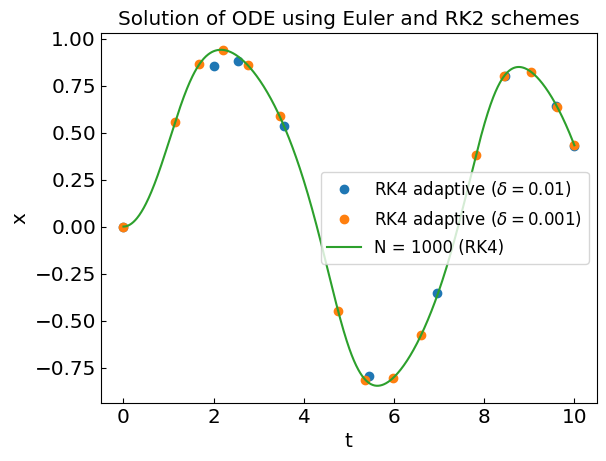

In [10]:
N = 10
h = (tend - t0) / N
delta = 1.e-2
ODEsolN10RK4adaptive = ode_rk4_adaptive(f,x0,t0,h,tend, delta)

delta2 = 1.e-3
ODEsolN10RK4adaptive2 = ode_rk4_adaptive(f,x0,t0,h,tend, delta2)

plt.plot(ODEsolN10RK4adaptive[0], ODEsolN10RK4adaptive[1], 'o', label='RK4 adaptive (${\delta}=$' + str(delta) + ')')
plt.plot(ODEsolN10RK4adaptive2[0], ODEsolN10RK4adaptive2[1], 'o', label='RK4 adaptive (${\delta}=$' + str(delta2) + ')')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000 (RK4)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler and RK2 schemes")
plt.show()

## Implicit methods and stiff equations

Consider the following ODE
$$
\frac{dx}{dt} = -15x,
$$
with $x(0) = 1$.

The solution is 
$$
x(t) = e^{-15t},
$$
which tends to zero as $t \to \infty$.

If you apply Euler's scheme with $h = 1/4$ we have

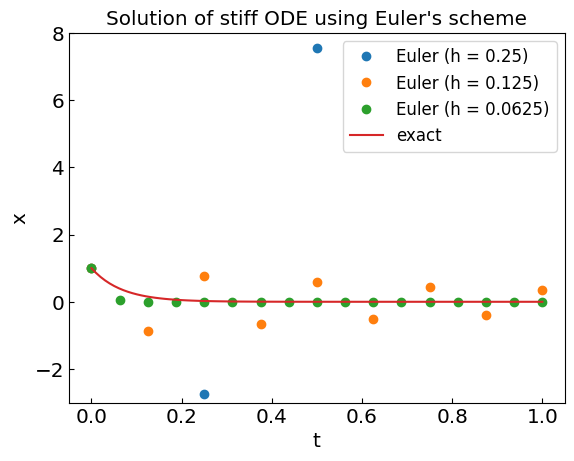

In [11]:
def f_stiff(x,t):
    return -15.*x

def x_stiff_sol(x,t):
    return np.exp(-15.*t)

h1 = 1./4.
t0 = 0.
tend = 1.0
N = round((tend - t0) / h1)
x0 = 1.

ODEsol_stiff1 = ode_euler(f_stiff,x0,t0,h1,N)

h2 = 1./8.
N = round((tend - t0) / h2)
ODEsol_stiff2 = ode_euler(f_stiff,x0,t0,h2,N)

h3 = 1./16.
N = round((tend - t0) / h3)
ODEsol_stiff3 = ode_euler(f_stiff,x0,t0,h3,N)

tref = np.linspace(0,1,100)
xref = x_stiff_sol(0., tref)

plt.plot(ODEsol_stiff1[0], ODEsol_stiff1[1], 'o', label='Euler (h = ' + str(h1) +')')
#plt.plot(ODEsol_stiff[0], ODEsol_stiff[1], label='Euler (h = 1/4)')
plt.plot(ODEsol_stiff2[0], ODEsol_stiff2[1], 'o', label='Euler (h = ' + str(h2) +')')
plt.plot(ODEsol_stiff3[0], ODEsol_stiff3[1], 'o', label='Euler (h = ' + str(h3) +')')
plt.plot(tref, xref, label='exact')
plt.ylim(-3.,8.)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of stiff ODE using Euler's scheme")
plt.show()

Euler's scheme gives
$$
x_{n+1} = x_n - 15 h x_n = (1 - 15 h) x_n = (1-15h)^n x_0
$$
where $x_n \equiv x(t+nh)$.

For $h > 2/15$ we have $|x_{n+1}| \to \infty$ as $n \to \infty$ (equivalent to $t \to \infty$), although the true solution exhibits $x \to \infty$ as $t \to \infty$.

This is an example of instability of ODE solver, which is typical for explicit solvers. The same for Runge-Kutta 4th order method.

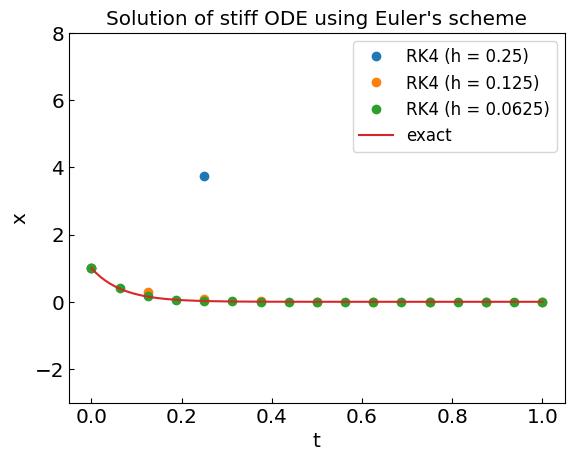

In [12]:
def f_stiff(x,t):
    return -15.*x

def x_stiff_sol(x,t):
    return np.exp(-15.*t)

h1 = 1./4.
t0 = 0.
tend = 1.0
N = round((tend - t0) / h1)
x0 = 1.

ODEsol_stiff1 = ode_rk4(f_stiff,x0,t0,h1,N)

h2 = 1./8.
N = round((tend - t0) / h2)
ODEsol_stiff2 = ode_rk4(f_stiff,x0,t0,h2,N)

h3 = 1./16.
N = round((tend - t0) / h3)
ODEsol_stiff3 = ode_rk4(f_stiff,x0,t0,h3,N)

tref = np.linspace(0,1,100)
xref = x_stiff_sol(0., tref)

plt.plot(ODEsol_stiff1[0], ODEsol_stiff1[1], 'o', label='RK4 (h = ' + str(h1) +')')
#plt.plot(ODEsol_stiff[0], ODEsol_stiff[1], label='Euler (h = 1/4)')
plt.plot(ODEsol_stiff2[0], ODEsol_stiff2[1], 'o', label='RK4 (h = ' + str(h2) +')')
plt.plot(ODEsol_stiff3[0], ODEsol_stiff3[1], 'o', label='RK4 (h = ' + str(h3) +')')
plt.plot(tref, xref, label='exact')
plt.ylim(-3.,8.)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of stiff ODE using Euler's scheme")
plt.show()

## Implicit methods

In implicit methods, the value of the variable at the next time step itself enters the r.h.s.
For example, implicit Euler's method reads
$$
x(t+h) = x(t) + h f[x(t+h),t+h].
$$

Applied to the stiff equation above we have
$$
x_{n+1} = x_n - 15 h x_{n+1},
$$
thus
$$
x_{n+1} = \frac{x_n}{1+15h} = \frac{x_0}{(1+15h)^n}.
$$
Here $x_{n+1} \to 0$ as $n \to \infty$ for any $h>0$, i.e. the method is stable.

Great stability, especially for stiff equations is the main advantage of implicity methods.
The drawback, is that one has to solve an algebraic equation at each time step to determine $x_{n+1}$ [or $x(t+h)$].

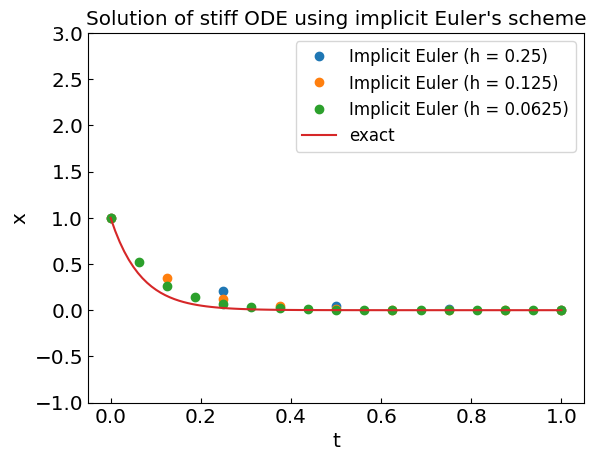

In [13]:
def stiff_implicit(x0,t0,h,nsteps,k=-15.):
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = x[i] / (1 - k*h)
    return t,x

t0 = 0.
tend = 1.0
h1 = 1./4.
N = round((tend - t0) / h1)
ODEsol_stiff1 = stiff_implicit(x0,t0,h1,N)

h2 = 1./8.
N = round((tend - t0) / h2)
ODEsol_stiff2 = stiff_implicit(x0,t0,h2,N)

h3 = 1./16.
N = round((tend - t0) / h3)
ODEsol_stiff3 = stiff_implicit(x0,t0,h3,N)

tref = np.linspace(0,1,100)
xref = x_stiff_sol(0., tref)

plt.plot(ODEsol_stiff1[0], ODEsol_stiff1[1], 'o', label='Implicit Euler (h = ' + str(h1) +')')
#plt.plot(ODEsol_stiff[0], ODEsol_stiff[1], label='Euler (h = 1/4)')
plt.plot(ODEsol_stiff2[0], ODEsol_stiff2[1], 'o', label='Implicit Euler (h = ' + str(h2) +')')
plt.plot(ODEsol_stiff3[0], ODEsol_stiff3[1], 'o', label='Implicit Euler (h = ' + str(h3) +')')
plt.plot(tref, xref, label='exact')
plt.ylim(-1.,3.)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of stiff ODE using implicit Euler's scheme")
plt.show()

## Systems of ODE

System of $N$ first-order ODEs
$$
\frac{d x_1}{dt} = f_1(x_1,\ldots,x_N,t),\\
\frac{d x_2}{dt} = f_2(x_1,\ldots,x_N,t),\\
\ldots \\
\frac{d x_N}{dt} = f_N(x_1,\ldots,x_N,t).
$$

In vector notation:
$$
\frac{d \mathbf{x}}{dt} = \mathbf{f}(\mathbf{x},t).
$$

All the methods we covered have exactly the same structure for systems of ODEs, applied to vectors:
- Euler method
$$
\mathbf{x}(t+h) = \mathbf{x}(t) + h \, \mathbf{f}[\mathbf{x}(t),t]~.
$$


- RK2
\begin{align}
\mathbf {k_1} & = h \, \mathbf{f}(\mathbf{x},t), \\
\mathbf {k_2} & = h \, \mathbf {f}(\mathbf {x}+\mathbf {k_1}/2,t+h/2), \\
\mathbf{x}(t+h) & = \mathbf {x}(t) + \mathbf {k_2}~.
\end{align}


- RK4
\begin{align}
\mathbf{k_1} & = h \, \mathbf{f}(\mathbf{x},t), \\
\mathbf{k_2} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_1}/2,t+h/2), \\
\mathbf{k_3} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_2}/2,t+h/2), \\
\mathbf{k_4} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_3},t+h), \\
\mathbf{x}(t+h) & = \mathbf{x}(t) + \frac{1}{6} (\mathbf{k_1} + 2\mathbf{k_2} + 2\mathbf{k_3} + \mathbf{k_4})~.
\end{align}


In [14]:
def ode_euler_multi(f, x0, t0, h, nsteps):
    """Multi-dimensional version of the Euler method.
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0,:] = x0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1,:] = ode_euler_step(f, x[i], t[i], h)
    return t,x

Example: System of equations
\begin{align}
\frac{dx}{dt} & = xy - x,\\
\frac{dy}{dt} & = y - xy + (\sin t)^2
\end{align}

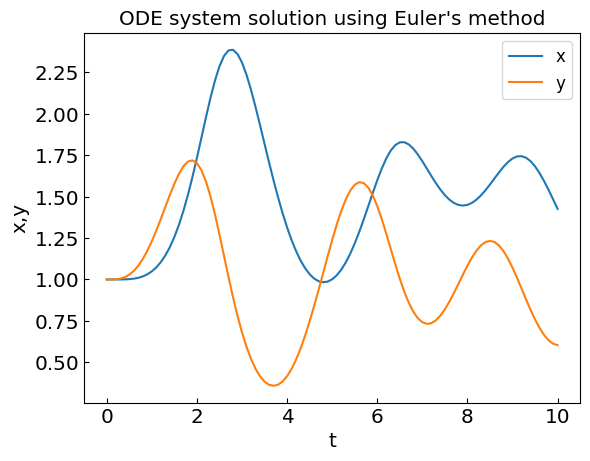

In [15]:
def ff(xin, t):
    x = xin[0]
    y = xin[1]
    return np.array([x*y-x,y-x*y+np.sin(t)**2])

a = 0.
b = 10.0
N = 100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

sol = ode_euler_multi(ff,[1.0,1.0], a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]
plt.title("ODE system solution using Euler's method")
plt.xlabel('t')
plt.ylabel('x,y')
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()


In [16]:
def ode_rk2_multi(f, x0, t0, h, nsteps):
    """Multi-dimensional version of the RK2 method.
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0,:] = x0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk2_step(f, x[i], t[i], h)
    return t,x

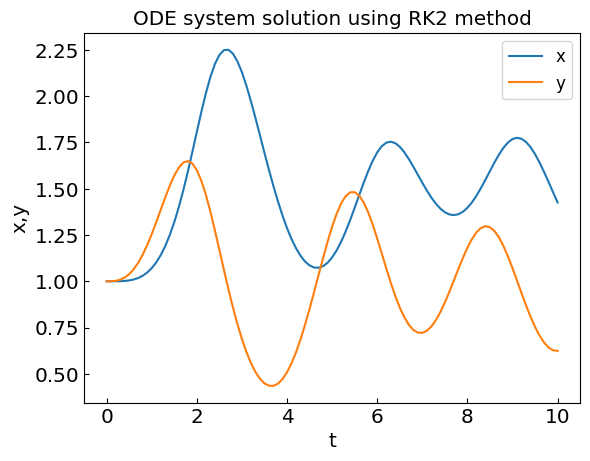

In [17]:
def ff(xin, t):
    x = xin[0]
    y = xin[1]
    return np.array([x*y-x,y-x*y+np.sin(t)**2])

a = 0.
b = 10.0
N = 100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

sol = ode_rk2_multi(ff,[1.0,1.0], a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]
plt.title("ODE system solution using RK2 method")
plt.xlabel('t')
plt.ylabel('x,y')
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

In [18]:
def ode_rk4_multi(f, x0, t0, h, nsteps):
    """Multi-dimensional version of the RK4 method.
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0,:] = x0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk4_step(f, x[i], t[i], h)
    return t,x

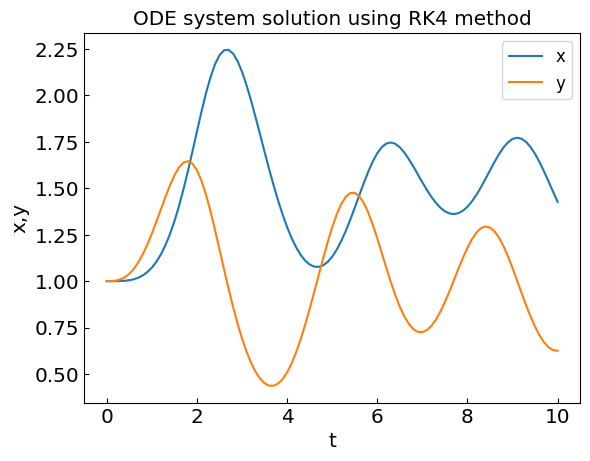

In [19]:
def ff(xin, t):
    x = xin[0]
    y = xin[1]
    return np.array([x*y-x,y-x*y+np.sin(t)**2])

a = 0.
b = 10.0
N = 100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

sol = ode_rk4_multi(ff,[1.0,1.0], a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]
plt.title("ODE system solution using RK4 method")
plt.xlabel('t')
plt.ylabel('x,y')
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

## Second-order ODEs

A system of $N$ 2nd-order ODEs

$$
\frac{d^2 \mathbf{x}}{dt^2} = \mathbf{f}(\mathbf{x}, d\mathbf{x}/dt,t),
$$

can be written as a system of $2N$ 1-st order ODEs by denoting $d\mathbf{x}/dt = \mathbf{v}$:

\begin{align*}
\frac{d \mathbf{x}}{dt} &= \mathbf{v},\\
\frac{d \mathbf{v}}{dt} &= \mathbf{f}(\mathbf{x}, \mathbf{v},t),
\end{align*}

and solved using standard methods.

This is particularly relevant for classical mechanics problems since Newton/Lagrange equations of motion correspond to a system of 2nd order ODEs.

## Simple pendulum in non-linear regime

![pendulum](pendulum.gif)

The equation of motion for non-linear pendulum reads
$$
m L \frac{d^2 \theta}{dt^2} = - m g \sin \theta.
$$

Denoting $d\theta / d t = \omega$, one can rewrite this 2nd-order differential equation as a system of two 1st-order equations
\begin{align}
\frac{d \theta}{dt} & = \omega, \\
\frac{d \omega}{dt} & = -\frac{g}{L} \sin \theta~,
\end{align}
which can be solved using standard first-order ODE methods.

For small angles $\theta$ one can approximate $\sin \theta \approx \theta$ and solved the equation
$$
m L \frac{d^2 \theta}{dt^2} \approx - m g \theta.
$$
For a pendulum initially at angle $\theta_0$, the analytic solution for small angles reads
$$
\theta(t) \approx \theta_0 \cos\left( \sqrt{\frac{g}{L}} t + \phi\right),
$$
where $\phi = 0$ if the pendulum is initially at rest.

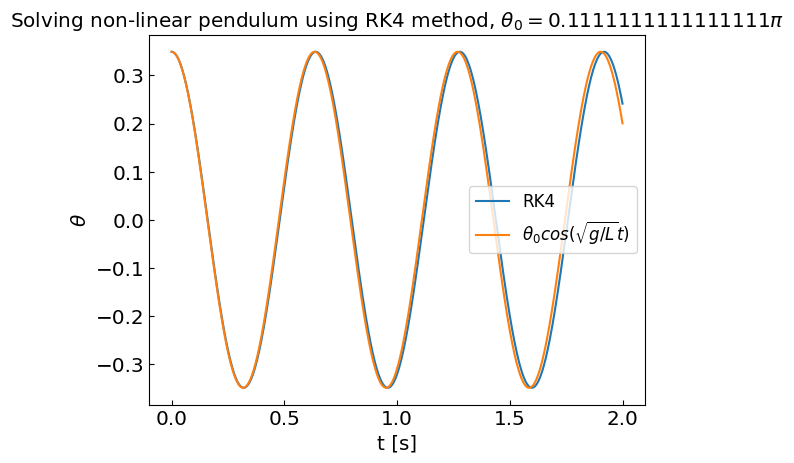

In [20]:
g = 9.81
L = 0.1

def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega,-g/L * np.sin(theta)])


theta0 = (20./180.) * np.pi
omega0 = 0.

x0 = np.array([theta0,omega0])
a = 0.
b = 2.0
N = 5000
h = (b-a)/N

sol = ode_rk4_multi(fpendulum, x0, a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]


def theta_small_angles(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

xpoints_small = theta_small_angles(tpoints)


plt.title("Solving non-linear pendulum using RK4 method, ${\\theta_0 = " + str(theta0/np.pi) + "\pi}$")
plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
plt.plot(tpoints,xpoints,label='RK4')
plt.plot(tpoints,xpoints_small,label='${\\theta_0 cos(\sqrt{g/L}t)}$')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

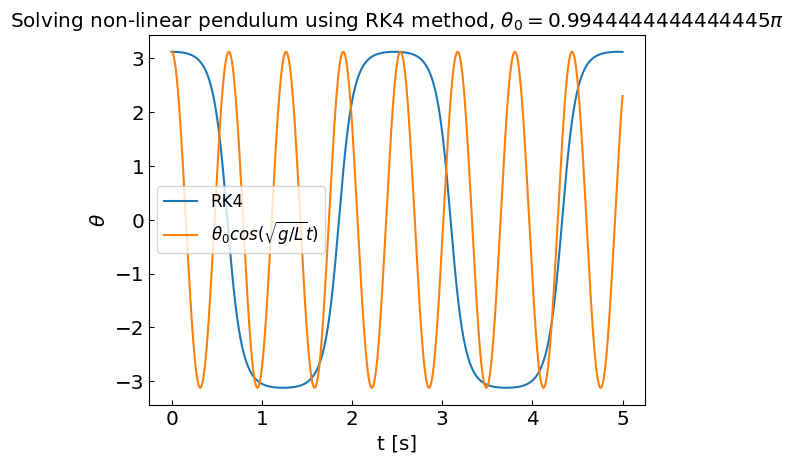

In [21]:
g = 9.81
L = 0.1

def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega,-g/L * np.sin(theta)])


theta0 = (179./180.) * np.pi
omega0 = 0.

x0 = np.array([theta0,omega0])
a = 0.
b = 5.0
N = 5000
h = (b-a)/N

sol = ode_rk4_multi(fpendulum, x0, a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]


def theta_small_angles(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

xpoints_small = theta_small_angles(tpoints)

plt.title("Solving non-linear pendulum using RK4 method, ${\\theta_0 = " + str(theta0/np.pi) + "\pi}$")
plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
plt.plot(tpoints,xpoints,label='RK4')
plt.plot(tpoints,xpoints_small,label='${\\theta_0 cos(\sqrt{g/L}t)}$')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()